<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initial-Jobless-Claims" data-toc-modified-id="Initial-Jobless-Claims-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initial Jobless Claims</a></span><ul class="toc-item"><li><span><a href="#Source" data-toc-modified-id="Source-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Source</a></span></li><li><span><a href="#Stretch-to-a-full-browser-width" data-toc-modified-id="Stretch-to-a-full-browser-width-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Stretch to a full browser width</a></span></li></ul></li><li><span><a href="#Visualize-the-Data" data-toc-modified-id="Visualize-the-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualize the Data</a></span><ul class="toc-item"><li><span><a href="#Print-original-data-as-is" data-toc-modified-id="Print-original-data-as-is-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Print original data as is</a></span></li><li><span><a href="#Plot-before-2020.03.19" data-toc-modified-id="Plot-before-2020.03.19-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Plot before 2020.03.19</a></span></li><li><span><a href="#Plot-after-2020.03.19" data-toc-modified-id="Plot-after-2020.03.19-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Plot after 2020.03.19</a></span></li></ul></li></ul></div>

# Initial Jobless Claims

Initial Jobless Claims show the number of people filing to receive unemployment insurance benefits for the first time over the past week. In other words, the indicator reflects how many people lost their jobs during the given period.

The indicator is used to assess the state of the labor market and general US economy health. Since the weekly flow of data show high volatility, four-week average values are often monitored instead. High volatility can stem from different factors. For example, there can be less claims due to a reduced working week (during holidays or vacations).

The systematic growth of the indicator points to a weakening of the labor market and to an increase in unemployment. Initial jobless claims typically rise before the economy enters the recession. Conversely, they may decline before the economy starts to recover. Therefore, it is considered a strong leading indicator of the US economy health.

In addition, the Fed takes into account the state of the labor market in its interest rate decision. So, the growth of jobless claims registered for several weeks in a row can have a negative effect on US dollar quotes.

## Source
- [https://www.mql5.com/en/economic-calendar/united-states/initial-jobless-claims](https://www.mql5.com/en/economic-calendar/united-states/initial-jobless-claims)

## Stretch to a full browser width

In [51]:
display("text/html", "<style>.container { width:100% !important; }</style>")

In [7]:
include("MarketIndicators.jl")

function: df = fetch_data(file_path, date_format="yyyy-mm-dd" )
function: df = shift_dates_by_days!(df, shift_days=-1, date_column=1)
function: rata_die = days_since_day_one(df, row, date_column) 
function: df = update_rata_die!(df, days_column=1, date_column=2)
function: df = insert_rata_die_column!(df)


In [8]:
df1 = fetch_data(file_initial_jobless_claims, "yyyy-mm-dd" )

,Date,ActualValue,ForecastValue,PreviousValue
,String,Int64,Int64⍰,Int64
1,2020.09.03,881,1059,1011
2,2020.08.27,1006,1039,1104
3,2020.08.20,1106,1078,971
4,2020.08.13,963,1316,1191
5,2020.08.06,1186,1435,1435
6,2020.07.30,1434,1368,1422
7,2020.07.23,1416,1315,1307
8,2020.07.16,1300,1379,1310
9,2020.07.09,1314,1200,1413


# Visualize the Data

## Print original data as is

- ActualValue before 2020.03.19 loose meaning 

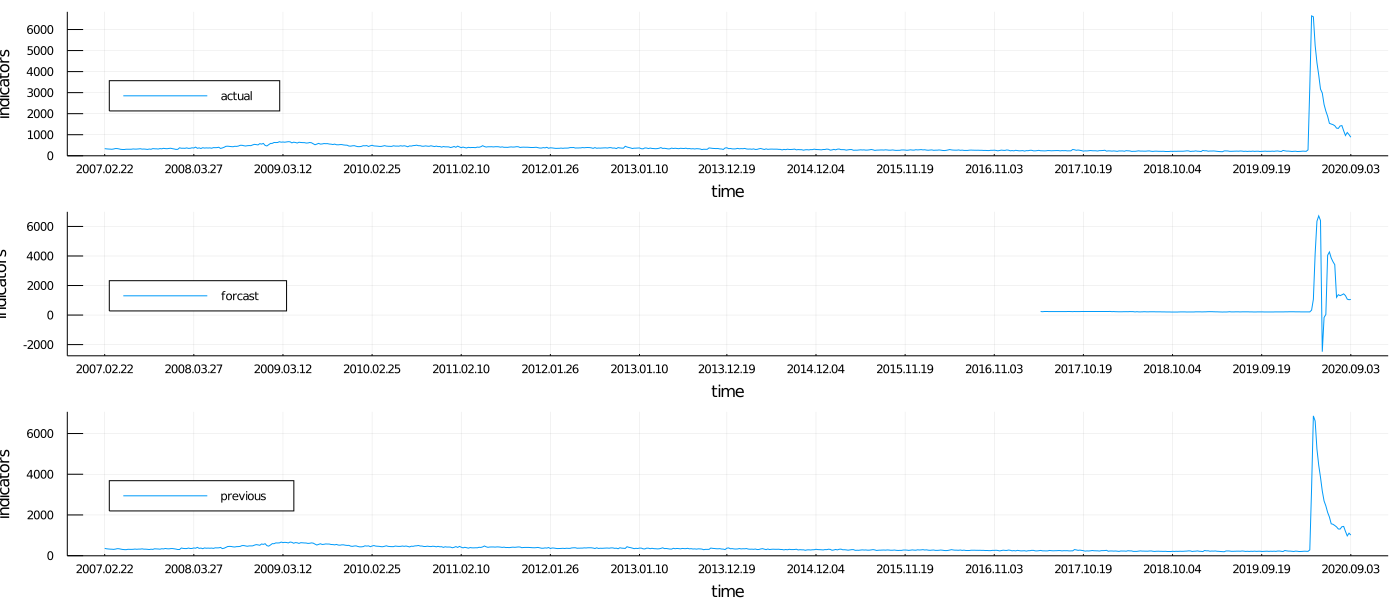

In [72]:
using Plots
gr()
plot(df2[:,1], 
    [df2[:,2]  df2[:,3] df2[:,4]  ], 
    label    = ["actual" "forcast" "previous"],
    legend    =:topleft, # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (1400, 600), # width, height
    layout = (3, 1)
    )

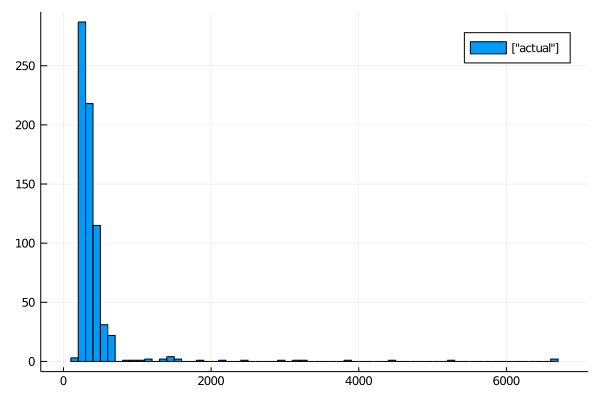

In [82]:
histogram( 
    df2[:,2], # data
    label    = ["actual"],
    nbins = 100)      # number of bars

## Plot before 2020.03.19

- the **ForecastValue** is total garbage
- the **PreviousValue** looks like shift, but it is not meaningful
- we will use only **ActualValue** however I need to figure out how to normalize it
    - from the histogram it looks that a jump in numbers (being very dangerous), is an outlyer (a black swan event)

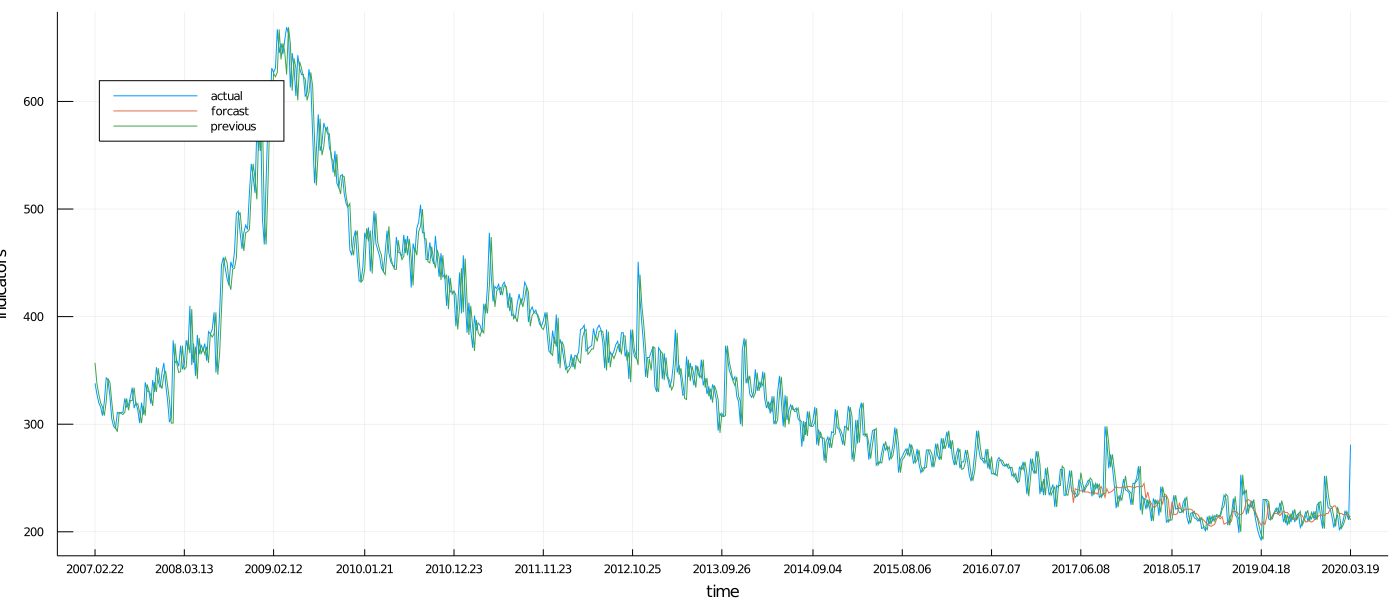

In [75]:
using Plots
gr()
plot(df2[1:end-24,1], 
    [df2[1:end-24,2] df2[1:end-24,3] df2[1:end-24,4] ], 
    label    = ["actual" "forcast" "previous"],
    legend    =:topleft, # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (1400, 600), # width, height
    layout = (1, 1)
    )

## Plot after 2020.03.19

- **ForecastValue** is total garbage
- **PreviousValue** looks like shift, but it is not meaningful

job loses started on 2020.03.19


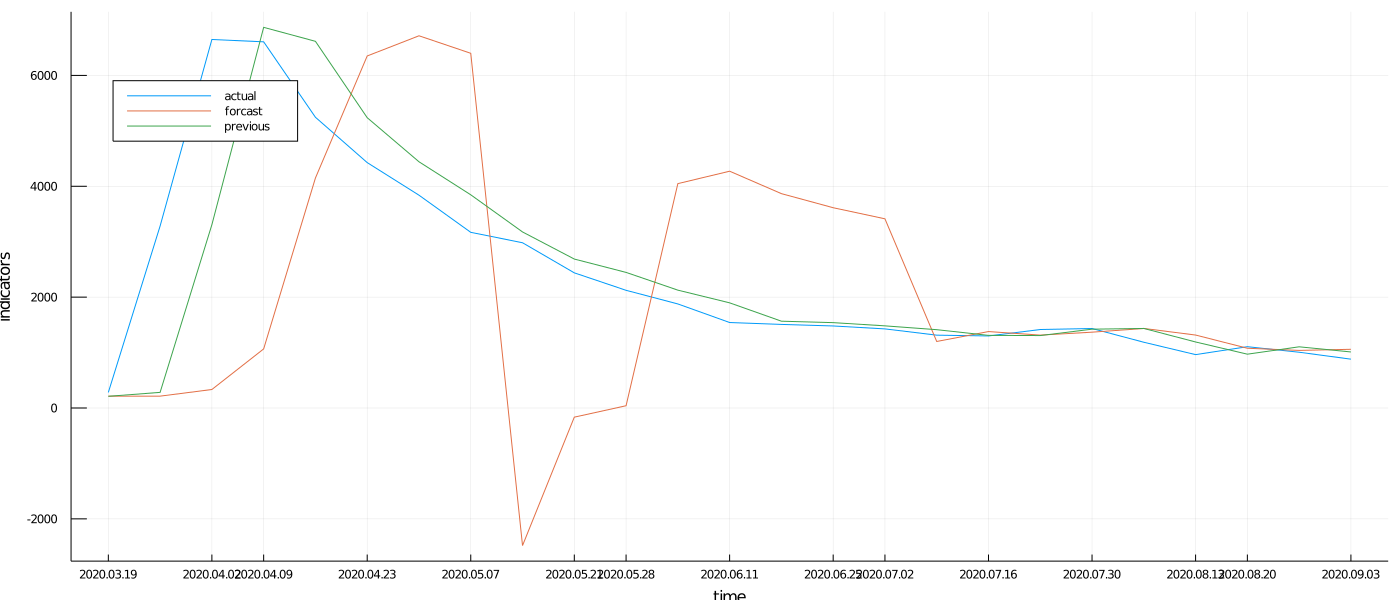

In [73]:
using Plots
println("job loses started on ", df2[end-24,1])
gr()
plot(df2[end-24:end,1], 
    [df2[end-24:end,2], df2[end-24:end,3] , df2[end-24:end,4] ], 
    label    = ["actual" "forcast" "previous"],
    legend    =:topleft, # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (1400, 600), # width, height
    layout = (1, 1)
    )

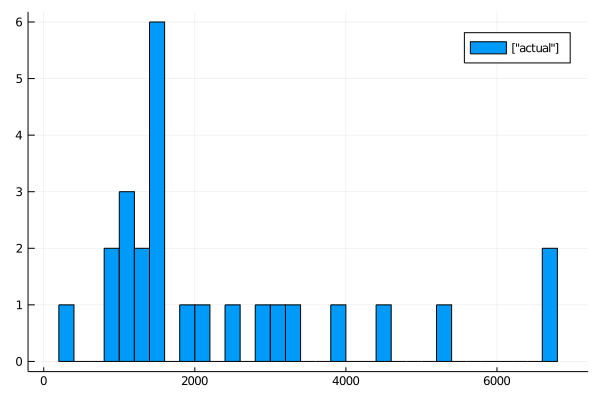

In [83]:
histogram( 
    df2[end-24:end,2], # data
    label    = ["actual"],
    nbins = 30)      # number of bars

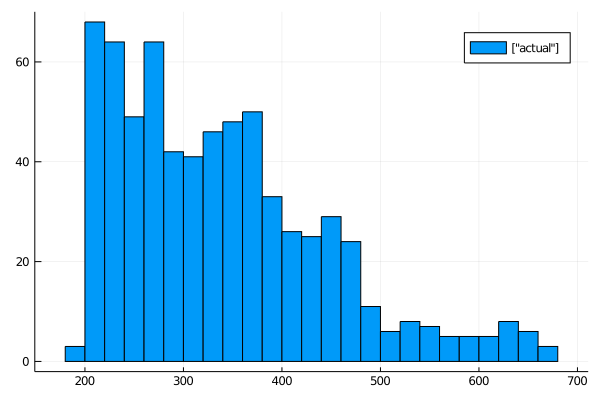

In [84]:
histogram( 
    df2[1:end-24,2], # data
    label    = ["actual"],
    nbins = 30)      # number of bars


In [85]:
using DataFrames, CSV
#sort!(df1, [:Date]);
df2 = sort(df1, (order(:Date, rev=false)));
first(df2,3)

,Date,ActualValue,ForecastValue,PreviousValue
,String,Int64,Int64⍰,Int64
1,2007.02.22,338,missing,357
2,2007.03.08,328,missing,338
3,2007.03.15,320,missing,328


In [86]:
last(df2,5)

,Date,ActualValue,ForecastValue,PreviousValue
,String,Int64,Int64⍰,Int64
1,2020.08.06,1186,1435,1435
2,2020.08.13,963,1316,1191
3,2020.08.20,1106,1078,971
4,2020.08.27,1006,1039,1104
5,2020.09.03,881,1059,1011
